In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nn import nn, ac, loss, metrics, opt
from datasets import spiral_dataset, data_split


In [2]:
X, y = spiral_dataset(150,3)
X_train, X_test, y_train, y_test = data_split(X,y,0.8)

In [19]:
np.random.seed(0)

net = nn.Network()
loss_fn = loss.Categorical_cross_entropy(net)
layers = [nn.Layer(2,10),ac.ReLU(),nn.Layer(10,10),ac.ReLU(),nn.Layer(10,4),ac.softmax()]
net.add_layer(layers)
sgd = opt.Optimizer_SGD(net,1,0.001)

In [ ]:
for epoch in range(301):
    y_pred = net.forward(X_train)
    loss_train =loss_fn.calculate(y_pred,y_train)
    acc_train = metrics.accuracy(y_pred,y_train)
    loss_fn.backward()
    sgd.step()
    if epoch % 100 == 0:
        print(f'epoch={epoch} ---- Loss= {loss_train:.4f} ---- accuracy= {acc_train:.4f} ---- learning_rate= {sgd.current_learning_rate}')

0.9888888888888889


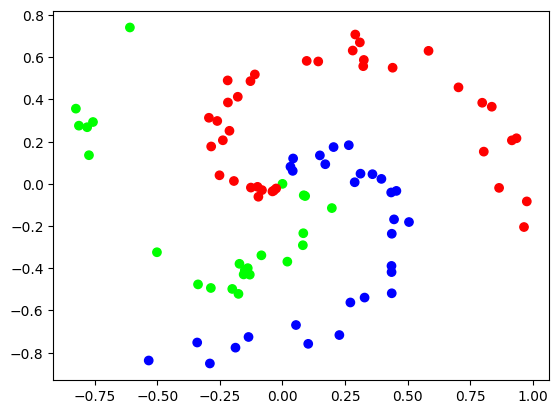

In [26]:
y_pred = net.forward(X_test)
y_labels = np.argmax(y_pred,axis=1)
acc_test = metrics.accuracy(y_pred,y_test)
print(acc_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_labels, cmap='brg')
plt.show()